# Homework: List of planets with mass and distance, Center of Mass for each system

# 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 

In [13]:
import pandas as pd 
import numpy as np

data_ep = pd.read_csv('data/exoplanet.eu_catalog.csv', 
                      usecols=['mass','mass_error_min',
                               'semi_major_axis','semi_major_axis_error_min','star_name'])

class System:
    def __init__(self, data):
        self.data=data
        self.system = list(self.data.groupby("star_name").groups.keys())
        self.Mass()
        self.CenterOfMass()
        #self.Error_CM()
        
    def Mass(self):
        sys = self.data.groupby("star_name")
        self.M_total = sys["mass"].sum()
    
    def CenterOfMass(self):
        self.rm_i = self.data["mass"].multiply(self.data["semi_major_axis"])
        self.data_i = self.data.assign(CM_i = self.rm_i.values) 
        p_system = self.data_i.groupby("star_name")
        sum_rm = p_system['CM_i'].sum()#.tolist()
        self.CM = sum_rm.divide(self.M_total)   
    
    def Error_CM(self):
        Sm2 = (self.data["mass_error_min"].multiply(self.data["mass_error_min"]))
        Sr2 = (self.data["semi_major_axis_error_min"].multiply(self.data["semi_major_axis_error_min"]))
        self.E_rm_i=np.sqrt(Sm2.divide(Sr2)+Sm2.divide(Sr2))

In [12]:
data_ep.index[1]==True
data_ep[]

True

In [14]:
data = data_ep[pd.notnull(data_ep["mass"])]
data = data[pd.notnull(data["semi_major_axis"])]
data1 = data[['star_name','mass','semi_major_axis']]

Data1=System(data1)

#Data1 = pd.DataFrame({'system_name':Data1.system,'total_mass':Data1.M_total.tolist(),'center_of_Mass':Data1.CM.tolist()})
#data1
#problema que guarda total mass en la funcion 

## 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 

**Remember**: `pd.notnull("name_of_column")` deletes the NaN values in the column. 

**Remember**: `data=data[['column_a','column_b',..,'column_n',]]` to get a new order in the DataFrame

### data1:
Now is necessary processing the data with the prurpose to obtain the Center of Mass CM, `data1` is a DataFrame without the NaN values of _mass_ and _semi major axis_. Finally, we get 1523 rows.

**Remember:** The `data.groupby("key")` split the data in groups which are the key.

**Remember:** The `data[i].multiply(data[j])` multiplies the comun i and j of DataFrame or Series i and j, row by row.

**Remember:** The `data.groupby.groups.keys()` get the keys of the split data.

However, the calculus of the CM, counting the planetary systems with the same satar. 


### data2:
So, `data2` is a DataFrame without the NaN values of mass, semi major axis and their uncertainties. Finally, we get 1220 rows, 303 rows less than `data1`. 

In [7]:
data2 = data_ep.dropna()
data2 = data2[['star_name',"mass","mass_error_min",
               "semi_major_axis", "semi_major_axis_error_min"]]

CM_2=CenterOfMass(data2).M_total()
#system_2 = list(data2.groupby("star_name").groups.keys())
#system
#data2 = pd.DataFrame({'system_name':system_2,'total_mass':M_total.tolist(),'center_of_Mass':CM_2.tolist()})
#data1

AttributeError: 'tuple' object has no attribute 'M_total'

In [88]:
print(M_total)

star_name
 OGLE-2016-BLG-1067L     0.43000
 TYC 4282-605-1         10.78000
11 Com                  19.40000
11 Oph                  21.00000
11 UMi                  10.50000
14 And                   5.33000
14 Her                   4.64000
16 Cyg B                 1.68000
18 Del                  10.30000
1RXS1609                14.00000
1SWASP J1407            20.00000
24 Boo                   0.91000
24 Sex                   2.85000
2M  1938+46              1.90000
2M 0103-55 (AB)         13.00000
2M 0122-24              20.00000
2M 0219-39              13.90000
2M 0441+23               7.50000
2M 0746+20              30.00000
2M 1207-39               4.00000
2M 2140+16              20.00000
2M 2206-20              30.00000
2M 2236+4751            12.50000
2MASS J1450-7841 A      40.00000
2MASS J1450-7841 B      40.00000
2MASS J2250+2325        30.00000
30 Ari B                 9.88000
38 Vir                   4.51000
4 Uma                    7.10000
42 Dra                   3.88000


#### For `data1`: #### 
The CM:

In [24]:
r_i = data1["semi_major_axis"]
m_i = data1["mass"]
#the multiplications between columns:
rm_i = r_i.multiply(m_i)
data1 = data1.assign(CM_i=rm_i.values) #New colimn in DataFrame with CM value, per each planet in the system. 
p_system = data1.groupby("star_name")
#p_system.count()

In [82]:
M_total = p_system["mass"].sum()#.tolist() changes from Series to list
sum_rm = p_system['CM_i'].sum()#.tolist()
CM = sum_rm.divide(M_total) #total center of mass, for each extraplanetary system

system = list(data.groupby("star_name").groups.keys())

print(len(p_system),len(CM),len(M_total))

data1 = pd.DataFrame({'system_name':system,'total_mass':M_total.tolist(),'center_of_Mass':CM.tolist()})
data1 #the data after get the Center of Mass for each system 

1292 1292 1292


,system_name,total_mass,center_of_Mass
0,OGLE-2016-BLG-1067L,0.43000,1.700000
1,TYC 4282-605-1,10.78000,0.422000
2,11 Com,19.40000,1.290000
3,11 Oph,21.00000,243.000000
4,11 UMi,10.50000,1.540000
5,14 And,5.33000,0.830000
6,14 Her,4.64000,2.770000
7,16 Cyg B,1.68000,1.680000
8,18 Del,10.30000,2.600000
9,1RXS1609,14.00000,330.000000


### 3. Gaussian Mixture Model


/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

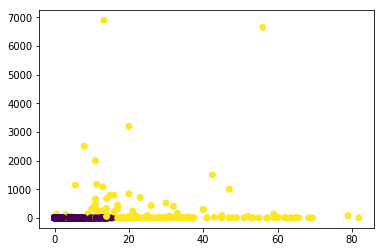

In [101]:
from sklearn.mixture import GMM
import matplotlib.pyplot as plt

gmm = GMM(2, covariance_type='full', random_state=0)
A=data1[["total_mass","center_of_Mass"]]
gmm.fit(A.values)
cluster_label = gmm.predict(A.values)
A.values[:, 0]
plt.scatter(A.values[:, 0], A.values[:, 1], c=cluster_label);